In [377]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error  # 루트 제곱 평균 오차
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import nltk  # 토큰화 불용어 처리

In [378]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv"

In [379]:
data = pd.read_csv(file_url)

In [380]:
data.describe(include="all")

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# 전처리 : 범주형 데이터 처리

In [381]:
repr(data["class"].unique()[1])

"' >50K'"

In [382]:
print(data["class"].unique())

[' <=50K' ' >50K']


In [383]:
# data["class"] = data["class"].str.strip()

In [384]:
data["class"] = data["class"].map({" <=50K": 0, " >50K": 1})

In [385]:
data["class"].head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64

In [386]:
data["age"].dtype

dtype('int64')

In [387]:
obj_list = []
for i in data.columns:
    # print(i,data[i].dtype)
    if data[i].dtype == "object":
        obj_list.append(i)
        
        
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [388]:
for i in obj_list:
    print(i,data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [389]:
for i in obj_list:
    if data[i].nunique()>=10:
        print(i,data[i].nunique())

education 16
occupation 14


native-country 41


In [390]:
data["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [391]:
data["class"]

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [392]:
import numpy as np


In [393]:
np.sort(data["education-num"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [394]:
data[data["education-num"] == 1]["education"].value_counts()

education
Preschool    83
Name: count, dtype: int64

In [395]:
for i in np.sort(data["education-num"].unique()):
    print(i,data[data["education-num"]==i]["education"].unique())

1 [' Preschool']
2 [' 1st-4th']
3 [' 5th-6th']
4 [' 7th-8th']
5 [' 9th']
6 [' 10th']
7 [' 11th']
8 [' 12th']
9 [' HS-grad']
10 [' Some-college']
11 [' Assoc-voc']
12 [' Assoc-acdm']
13 [' Bachelors']
14 [' Masters']
15 [' Prof-school']
16 [' Doctorate']


In [396]:
data.drop("education",axis=1,inplace=True)

In [397]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [398]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [399]:
data["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [400]:
data[data["native-country"]=="Korea"]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


In [401]:
country_group = data.groupby(["native-country"])["class"].mean()

In [402]:
country_group.head()

native-country
Cambodia    0.321429
Canada      0.346154
China       0.295082
Columbia    0.047059
Cuba        0.246377
Name: class, dtype: float64

In [403]:
country_group = country_group.reset_index()

In [404]:
country_group.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
native-country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
class,0.321429,0.346154,0.295082,0.047059,0.246377,0.048544,0.133333,0.070968,0.370079,0.421053,...,0.179104,0.108696,0.142857,0.173913,0.4,0.166667,0.074074,0.243977,0.081395,0.347826


In [405]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [406]:
data = data.merge(country_group, on="native-country", how="left")

In [407]:
data.head(1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977


In [408]:
data.drop("native-country",axis=1,inplace=True)

In [409]:
data.head(1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977


In [410]:
data = data.rename(columns={"class_x":"class","class_y":"native-country"})

In [411]:
data.head(1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977


# 전처리 : 결측치 

In [412]:
data.isna().mean()*100

age               0.000000
workclass         5.730724
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    1.754637
dtype: float64

In [413]:
data["native-country"] = data["native-country"].fillna(-99)

In [414]:
data["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [415]:
data["workclass"] = data["workclass"].fillna("Private")

In [416]:
data["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [417]:
data["occupation"] = data["occupation"].fillna("Unknown")

In [418]:
data.isna().mean()*100

age               0.0
workclass         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
class             0.0
native-country    0.0
dtype: float64

# 전처리 : 범주형 => 수치로 형변환

In [419]:
data = pd.get_dummies(data,drop_first=True)

In [420]:
data.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'class', 'native-country', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'workclass_Private',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-mov

In [421]:
X_train,X_test,y_train,y_test = train_test_split(data.drop("class",axis=1),data["class"],test_size=0.2,random_state=30)

In [422]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [423]:
y_pred = model.predict(X_test)

In [424]:
accuracy_score(y_test,y_pred)

0.8222950148428703

In [425]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Train score:", accuracy_score(train_pred, y_train))
print("Test score:", accuracy_score(test_pred, y_test))

Train score: 0.854605482046426
Test score: 0.8483979936533934


In [426]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Train score:" , accuracy_score(train_pred,y_train))
print("Test score:", accuracy_score(test_pred, y_test))

Train score: 0.8619763007703529
Test score: 0.8525949431876344


In [427]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(
 |      *,
 |      criterion='gini',
 |      splitter='best',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=None,
 |      random_state=None,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      monotonic_cst=None
 |  )
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best",

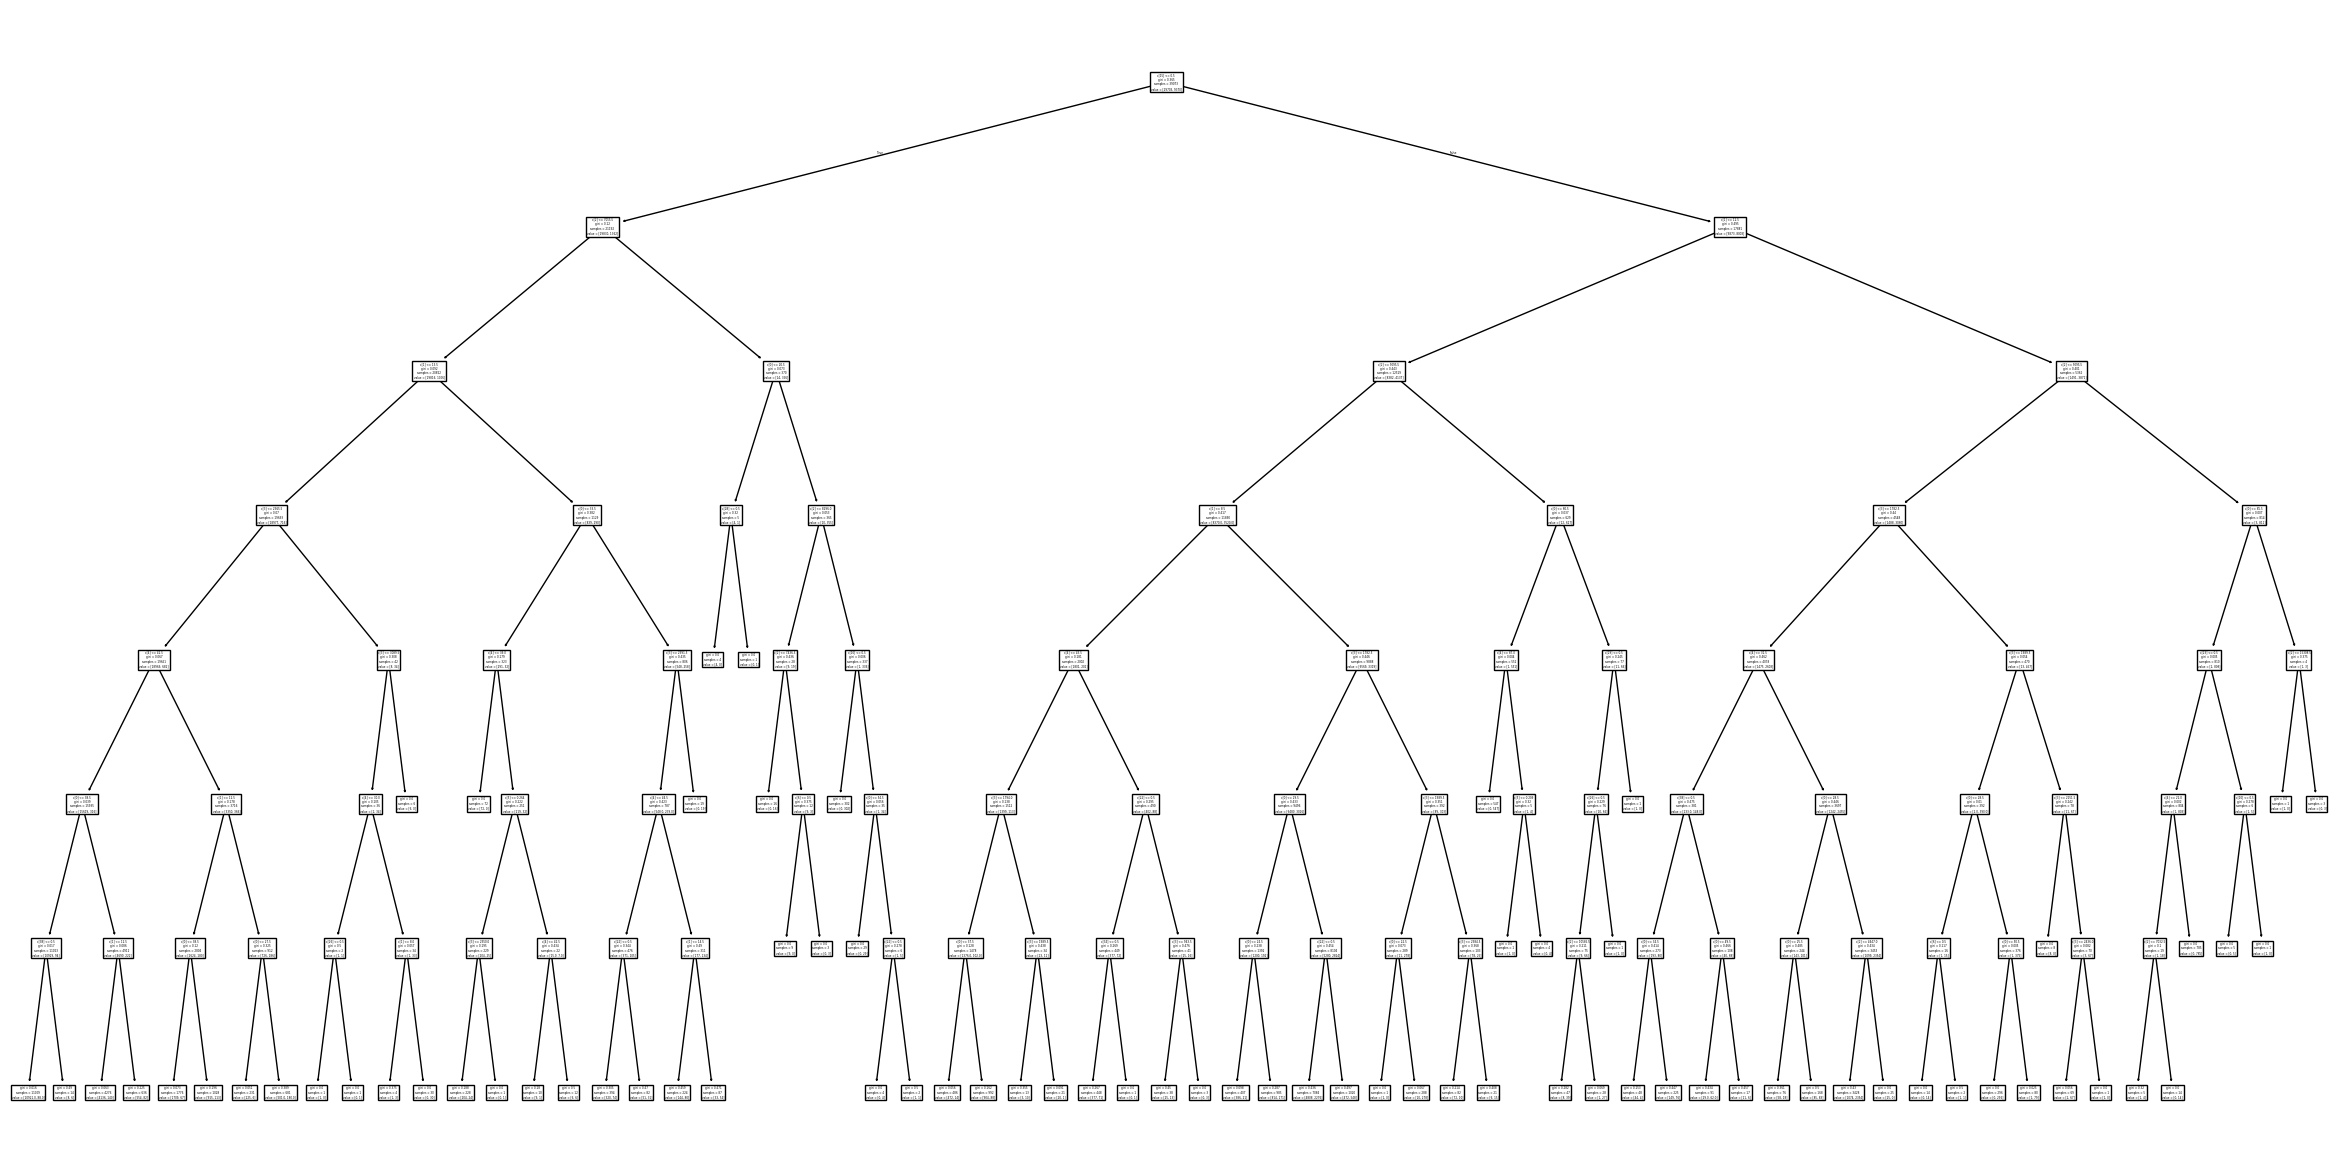

In [428]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(model)
plt.show()

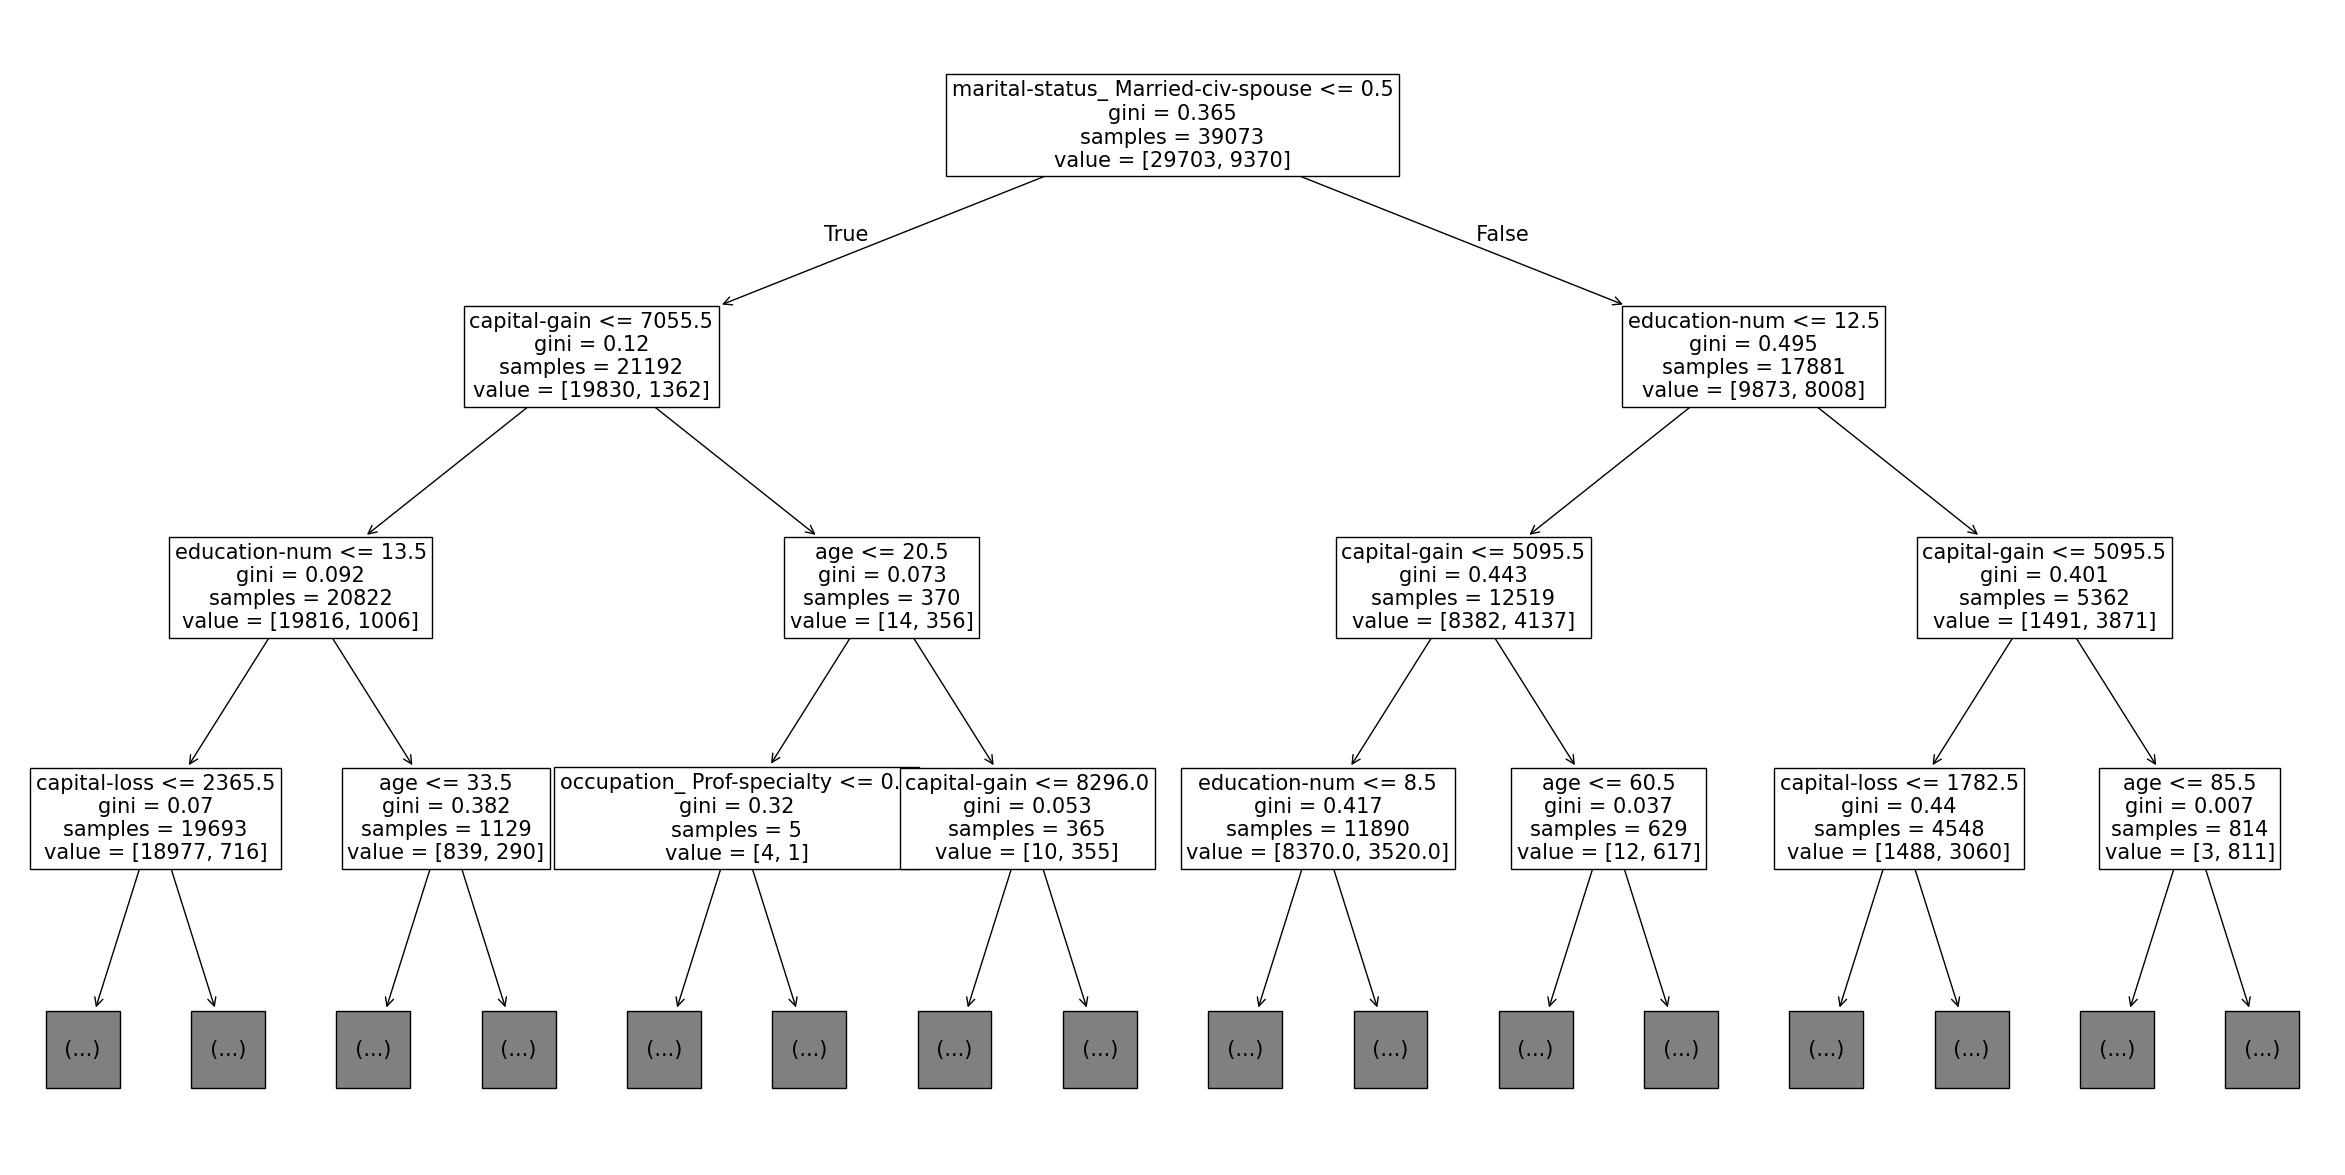

In [429]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))
plot_tree(model,max_depth=3,fontsize=15,feature_names=X_train.columns)
plt.show()

In [465]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv"

In [547]:
data = pd.read_csv(file_url)
titanic = pd.read_csv(file_url)

In [552]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [548]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [550]:
titanic = pd.get_dummies(titanic, columns=["Sex", "Embarked"], drop_first=True)

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [551]:
titanic.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0,True,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,1,False,False,False
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,1,False,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,1,False,False,True
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,0,True,False,True


In [467]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [468]:
data.isna().mean()*100


Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Embarked    0.0
Survived    0.0
dtype: float64

In [ ]:
data.drop(["Name", "Ticket"], axis=1, inplace=True)

In [470]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,male,22.0,1,0,A/5 21171,S,0
1,1,female,38.0,1,0,PC 17599,C,1
2,3,female,26.0,0,0,STON/O2. 3101282,S,1
3,1,female,35.0,1,0,113803,S,1
4,3,male,35.0,0,0,373450,S,0


In [ ]:
# data.drop("Ticket", axis=1, inplace=True)

In [ ]:
data = pd.get_dummies(data,drop_first=True)

In [473]:
data.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True


In [474]:
def split(data):
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop("Survived", axis=1), data["Survived"],test_size=0.2,random_state=100
    )
    return X_train, X_test, y_train, y_test

In [475]:
X_train, X_test, y_train, y_test = split(data)

In [476]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((711, 7), (178, 7), (711,), (178,))

In [477]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [478]:
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

In [479]:
print("train accu : ", accuracy_score(X_train_pred,y_train))
print("test accu : ", accuracy_score(X_test_pred,y_test))


train accu :  0.869198312236287
test accu :  0.8202247191011236


In [514]:
def model_accu(data,max_depth=5):
    X_train, X_test, y_train, y_test = split(data)
    model = DecisionTreeClassifier(max_depth=max_depth,random_state=30)
    model.fit(X_train, y_train)
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)
    train_acc = round(accuracy_score(X_train_pred, y_train), 3)
    test_acc = round(accuracy_score(X_test_pred, y_test), 3)
    return train_acc, test_acc

In [515]:
for i in range(5,10):
    train_acc, test_acc = model_accu(data,i)
    print("------------------------------------------------------")
    print("train accu : ", train_acc)
    print("test accu : ", test_acc)
    print("max_Dept : ",i, " : ",
        round(train_acc - test_acc,3),
    )

------------------------------------------------------
train accu :  0.838
test accu :  0.837
max_Dept :  5  :  0.001
------------------------------------------------------
train accu :  0.855
test accu :  0.826
max_Dept :  6  :  0.029
------------------------------------------------------
train accu :  0.869
test accu :  0.82
max_Dept :  7  :  0.049
------------------------------------------------------
train accu :  0.886
test accu :  0.809
max_Dept :  8  :  0.077
------------------------------------------------------
train accu :  0.899
test accu :  0.815
max_Dept :  9  :  0.084


In [516]:
data2 = data.copy()

In [517]:
data2.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True


In [518]:
data2["familly"] = data2["SibSp"]+ data2["Parch"]

In [519]:
data2.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S,familly
0,3,22.0,1,0,0,True,False,True,1
1,1,38.0,1,0,1,False,False,False,1
2,3,26.0,0,0,1,False,False,True,0
3,1,35.0,1,0,1,False,False,True,1
4,3,35.0,0,0,0,True,False,True,0


In [520]:
data2.drop(["SibSp","Parch"],axis=1,inplace=True)

In [521]:
X_train,X_test,y_train,y_test =split(data2)

In [522]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 6), (178, 6), (711,), (178,))

In [529]:
for i in range(5, 10):
    train_acc, test_acc = model_accu(data, max_depth=i)
    print("------------------------------------------------------")
    print("train accu : ", train_acc)
    print("test accu : ", test_acc)
    print(
        "max_Dept : ",
        i,
        " : ",
        round(train_acc - test_acc, 3),
    )
    

------------------------------------------------------
train accu :  0.838
test accu :  0.837
max_Dept :  5  :  0.001
------------------------------------------------------
train accu :  0.855
test accu :  0.826
max_Dept :  6  :  0.029
------------------------------------------------------
train accu :  0.869
test accu :  0.82
max_Dept :  7  :  0.049
------------------------------------------------------
train accu :  0.886
test accu :  0.809
max_Dept :  8  :  0.077
------------------------------------------------------
train accu :  0.899
test accu :  0.815
max_Dept :  9  :  0.084


In [524]:
for i in range(5, 10):
    train_acc, test_acc = model_accu(data2, max_depth=i)
    print("------------------------------------------------------")
    print("train accu : ", train_acc)
    print("test accu : ", test_acc)
    print(
        "max_Dept : ",
        i,
        " : ",
        round(train_acc - test_acc, 3),
    )

------------------------------------------------------
train accu :  0.841
test accu :  0.843
max_Dept :  5  :  -0.002
------------------------------------------------------
train accu :  0.859
test accu :  0.82
max_Dept :  6  :  0.039
------------------------------------------------------
train accu :  0.875
test accu :  0.815
max_Dept :  7  :  0.06
------------------------------------------------------
train accu :  0.88
test accu :  0.82
max_Dept :  8  :  0.06
------------------------------------------------------
train accu :  0.899
test accu :  0.809
max_Dept :  9  :  0.09


In [525]:
data.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True


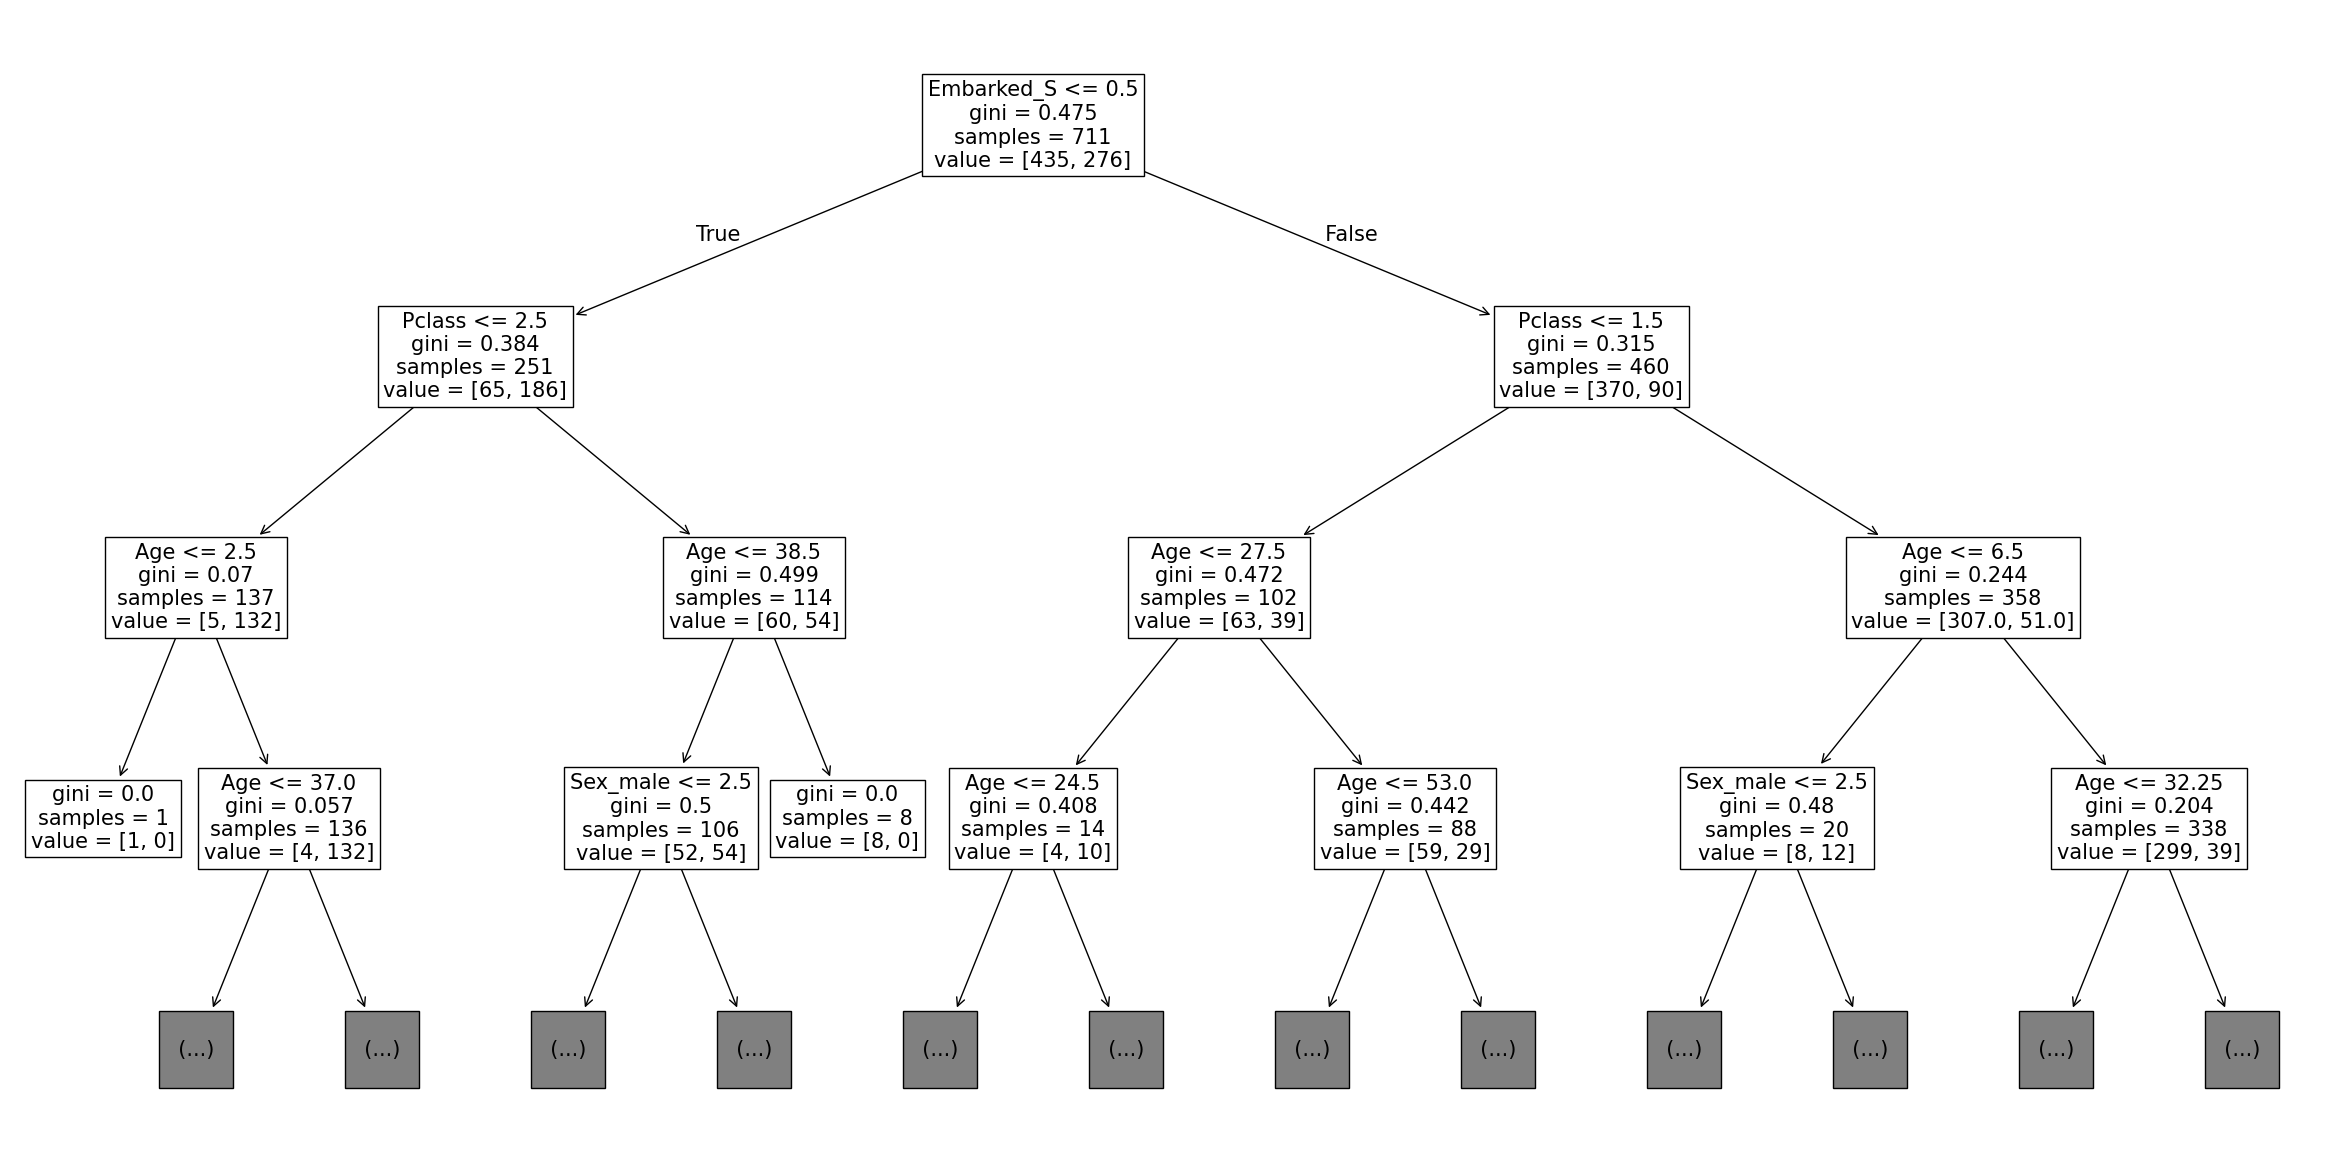

In [530]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))
plot_tree(model, max_depth=3, fontsize=15, feature_names=X_train.columns)
plt.show()